In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [2]:
(train_images,train_labels), (test_images, test_labels)= datasets.cifar100.load_data()
train_images, test_images=train_images/255.0, test_images/255.0


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


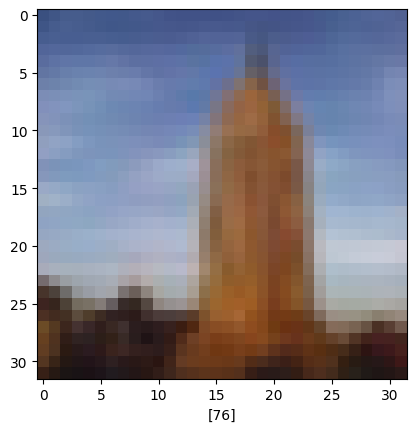

In [3]:
IMG_INDEX=45
plt.imshow(train_images[IMG_INDEX], cmap=plt.cm.binary)
plt.xlabel(train_labels[IMG_INDEX])
plt.show()

In [9]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))

In [10]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,248 (364.25 KB)

 Trainable params: 93,248 (364.25 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 100)                 │           6,500 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 230,884 (901.89 KB)

 Trainable params: 230,884 (901.89 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history=model.fit(train_images, train_labels, epochs=20,
                  validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.4636 - loss: 1.9975 - val_accuracy: 0.3655 - val_loss: 2.5682
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4827 - loss: 1.9056 - val_accuracy: 0.3702 - val_loss: 2.5466
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4968 - loss: 1.8550 - val_accuracy: 0.3738 - val_loss: 2.5698
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5120 - loss: 1.7874 - val_accuracy: 0.3770 - val_loss: 2.5980
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5222 - loss: 1.7423 - val_accuracy: 0.3734 - val_loss: 2.6518
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5333 - loss: 1.6868 - val_accuracy: 0.3757 - val_loss: 2.6475
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5456 - loss: 1.6340 - val_accuracy: 0.3621 - val_loss: 2.7516
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5610 - loss: 1.5731 -

In [15]:
test_loss, test_acc=model.evaluate(test_images, test_labels, verbose=2)
print(test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.3412 - loss: 3.5593
0.34119999408721924


In [ ]:
# from keras.preprocessing import image
# from keras.preprocessing.image import ImageDataGenerator

# # creates a data generator object that transforms images
# datagen = ImageDataGenerator(
# rotation_range=40,
# width_shift_range=0.2,
# height_shift_range=0.2,
# shear_range=0.2,
# zoom_range=0.2,
# horizontal_flip=True,
# fill_mode='nearest')

# # pick an image to transform
# test_img = train_images[20]
# img = image.img_to_array(test_img)  # convert image to numpy arry
# img = img.reshape((1,) + img.shape)  # reshape image

# i = 0

# for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
#     plt.figure(i)
#     plot = plt.imshow(image.img_to_array(batch[0]))
#     i += 1
#     if i > 4:  # show 4 images
#         break

# plt.show()
